# 1) Data Description

**Information about players data:**
- 7 variables: experience (chr), subscriber yes/no (lgl), hashed email (chr), hours played (dbl), name (chr), gender (chr), and age (dbl)
- 196 observations (players)

| Variable              | Min | Mean       | Max  |
|:----------------------|:---:|:----------:|------|
| Time played (hours)   | 0.00|     5.85   |223.10|
| Age (years)           | 9.00|    21.14   |   58 |

| Variable              | Mode | # of Labels |
|:----------------------|:----:|------------:|
|Experience             |
|Subscription status    |
| Name                  |
| Gender                |


**Information about sessions data:**
- 5 variables: hashed email (chr), start time (chr), end time (chr), original start time (dbl), and original end time (dbl)
- 1535 observations (sessions)

# 2) Questions

**Broad question:** What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types?

**Specific question:** Can age and time played on the server predict the subscription status of a player?

# 3) Exploratory Data Analysis and Visualization

In [9]:
library(tidyverse)

players_data <- read_csv("https://raw.githubusercontent.com/ellakiciman/dsci100_project_individual/refs/heads/main/players.csv")
sessions_data <- read_csv("https://raw.githubusercontent.com/ellakiciman/dsci100_project_individual/refs/heads/main/sessions.csv")
head(players_data)
head(sessions_data)

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024 03:22,25/07/2024 03:58,1.72188e+12,1.72188e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25/05/2024 16:01,25/05/2024 16:12,1.71665e+12,1.71665e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,23/06/2024 15:08,23/06/2024 17:10,1.71916e+12,1.71916e+12


In [17]:
players_data_means <- players_data |>
    select(played_hours, Age) |>
    map_df(mean, na.rm = TRUE)
players_data_means

played_hours,Age
<dbl>,<dbl>
5.845918,21.13918


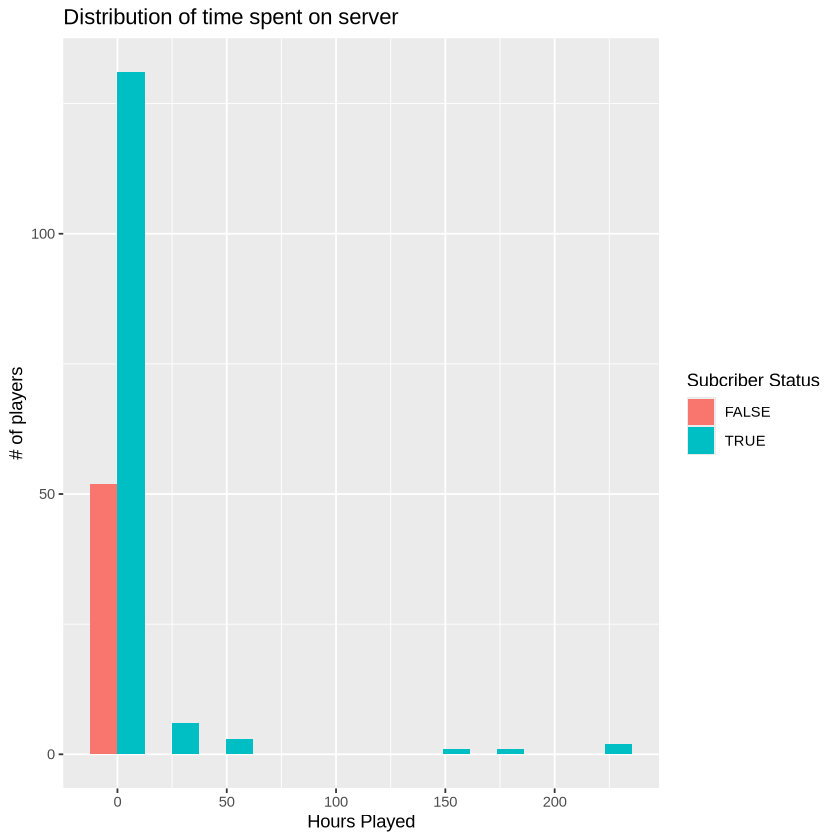

In [18]:
time_played_plot <- players_data |>
    ggplot(aes(x = played_hours, fill = subscribe)) +
    geom_histogram(position = "dodge", bins = 10) +
    labs(x = "Hours Played", y = "# of players",
         fill = "Subcriber Status",
         title = "Distribution of time spent on server")
time_played_plot

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


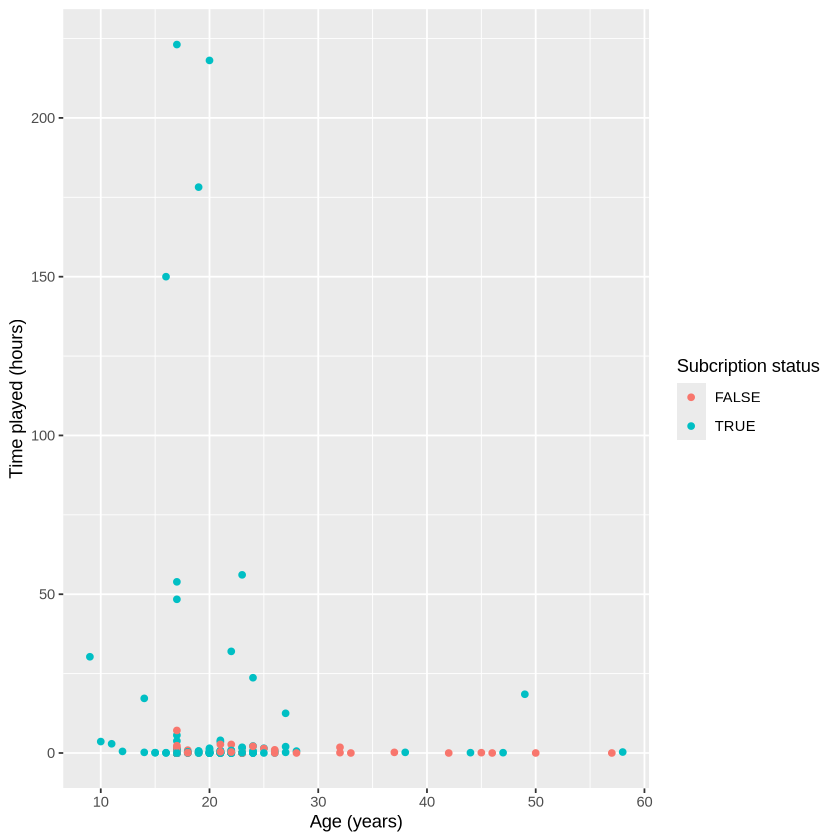

In [8]:
subscribe_plot <- players_data |>
    ggplot(aes(x = Age, y = played_hours, color = subscribe)) +
        geom_point() +
        labs(x = "Age (years)", y = "Time played (hours)", 
             color = "Subcription status",
             title = Age vs )
subscribe_plot